In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.interpolate

# from typing import NamedTuple
from collections import namedtuple

In [2]:
oc.runner.runner = oc.oommf.TclOOMMFRunner("/home/david/software/oommf/oommf.tcl")

Running OOMMF (TclOOMMFRunner)[2024/12/04 14:37]... (0.3 s)
OOMMF found and running.


In [26]:
# Material parameters
A = 2e-12  # Jm^-1
D = 3.9e-3  # Jm^-2
M_s = 1.1e6  # Am^-1
K_u = 2.5e6  # Jm^-3

L = 50

In [27]:
# Use units in the nm scale
nm = 1e-9
delta = (np.sqrt(A / K_u)) / nm
xi = (2 * A / D) / nm

In [66]:
def dot(r):
    d = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
    if d < 2e-9:
        return (0, 0.1, -0.9)
    else:
        return (0, 0.1, 0.9)

In [80]:
mesh = df.Mesh(p1=(-10e-9, -10e-9, 0), p2=(10e-9, 10e-9, 1e-9), n=(40, 40, 1))

# Define the system
system = mm.System(name=f"twodsk")
system.m = df.Field(mesh, nvdim=3, value=dot, norm=M_s)
system.energy = (
    mm.Exchange(A=A)
    + mm.UniaxialAnisotropy(K=K_u, u=[0, 0, 1])
    + mm.DMI(D=D, crystalclass="Cnv_z", suffix="12ngbrs_RobinBC")
    + mm.Zeeman(H=(0, 0, 1. / mm.consts.mu0))
)

# Run the simulation
mindriver = oc.MinDriver(stopping_mxHxm=0.01)
mindriver.drive(system)

Running OOMMF (TclOOMMFRunner)[2024/12/04 15:01]... (1.1 s)


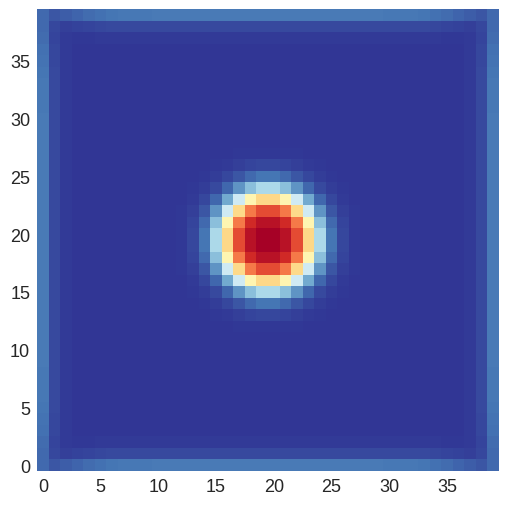

In [94]:
f, ax = plt.subplots()
ax.imshow(system.m.array[:, :, :, 2] / M_s, origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
# ax.quiver(system.m.array[:, :, :, 0] / M_s, system.m.array[:, :, :, 1] / M_s)
plt.show()

In [95]:
mesh = df.Mesh(p1=(-10e-9, -10e-9, 0), p2=(10e-9, 10e-9, 1e-9), n=(40, 40, 1))

# Define the system
system = mm.System(name=f"twodsk")
system.m = df.Field(mesh, nvdim=3, value=dot, norm=M_s)
system.energy = (
    mm.Exchange(A=A)
    + mm.UniaxialAnisotropy(K=K_u, u=[0, 0, 1])
    + mm.DMI(D=D, crystalclass="Cnv_z", suffix="12ngbrs")
    + mm.Zeeman(H=(0, 0, 1. / mm.consts.mu0))
)

# Run the simulation
mindriver = oc.MinDriver(stopping_mxHxm=0.01)
mindriver.drive(system)

Running OOMMF (TclOOMMFRunner)[2024/12/04 15:06]... (0.4 s)


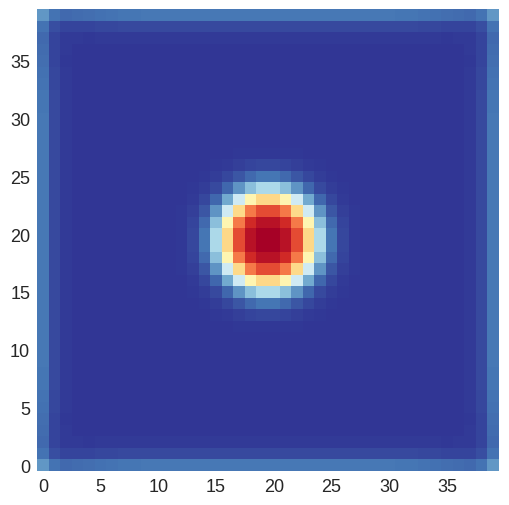

In [96]:
f, ax = plt.subplots()
ax.imshow(system.m.array[:, :, :, 2] / M_s, origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
# ax.quiver(system.m.array[:, :, :, 0] / M_s, system.m.array[:, :, :, 1] / M_s)
plt.show()

In [97]:
mesh = df.Mesh(p1=(-10e-9, -10e-9, 0), p2=(10e-9, 10e-9, 1e-9), n=(40, 40, 1))

# Define the system
system = mm.System(name=f"twodsk")
system.m = df.Field(mesh, nvdim=3, value=dot, norm=M_s)
system.energy = (
    mm.Exchange(A=A)
    + mm.UniaxialAnisotropy(K=K_u, u=[0, 0, 1])
    + mm.DMI(D=D, crystalclass="Cnv_z", suffix="6ngbrs")
    + mm.Zeeman(H=(0, 0, 1. / mm.consts.mu0))
)

# Run the simulation
mindriver = oc.MinDriver(stopping_mxHxm=0.01)
mindriver.drive(system)

Running OOMMF (TclOOMMFRunner)[2024/12/04 15:07]... (0.4 s)


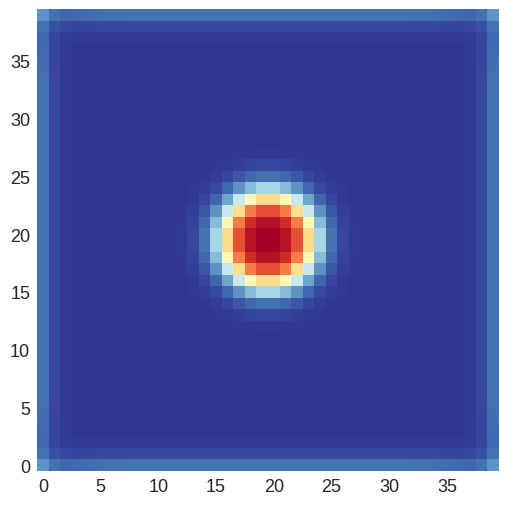

In [98]:
f, ax = plt.subplots()
ax.imshow(system.m.array[:, :, :, 2] / M_s, origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
# ax.quiver(system.m.array[:, :, :, 0] / M_s, system.m.array[:, :, :, 1] / M_s)
plt.show()